In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
benign_df = pd.read_csv('./data/5.benign.csv')

g_c_df = pd.read_csv('./data/5.gafgyt.combo.csv')
g_j_df = pd.read_csv('./data/5.gafgyt.junk.csv')
g_s_df = pd.read_csv('./data/5.gafgyt.scan.csv')
g_t_df = pd.read_csv('./data/5.gafgyt.tcp.csv')
g_u_df = pd.read_csv('./data/5.gafgyt.udp.csv')
m_a_df = pd.read_csv('./data/5.mirai.ack.csv')
m_sc_df = pd.read_csv('./data/5.mirai.scan.csv')
m_sy_df = pd.read_csv('./data/5.mirai.syn.csv')
m_u_df = pd.read_csv('./data/5.mirai.udp.csv')
m_u_p_df = pd.read_csv('./data/5.mirai.udpplain.csv')

In [37]:
benign_df['type'] = 'benign'
m_u_df['type'] = 'mirai_udp'
g_c_df['type'] = 'gafgyt_combo'
g_j_df['type'] = 'gafgyt_junk'
g_s_df['type'] = 'gafgyt_scan'
g_t_df['type'] = 'gafgyt_tcp'
g_u_df['type'] = 'gafgyt_udp'
m_a_df['type'] = 'mirai_ack'
m_sc_df['type'] = 'mirai_scan'
m_sy_df['type'] = 'mirai_syn'
m_u_p_df['type'] = 'mirai_udpplain'

In [38]:
df = pd.concat([benign_df, m_u_df, g_c_df,
                g_j_df, g_s_df, g_t_df,
                g_u_df, m_a_df, m_sc_df,
                m_sy_df, m_u_p_df],
                axis=0, sort=False, ignore_index=True)

In [39]:
df["type"].value_counts()

type
mirai_udp         156248
gafgyt_tcp        104510
gafgyt_udp        104011
mirai_scan         96781
mirai_syn          65746
benign             62154
gafgyt_combo       61380
mirai_ack          60554
mirai_udpplain     56681
gafgyt_junk        30898
gafgyt_scan        29297
Name: count, dtype: int64

<Axes: title={'center': 'Class Distribution'}>

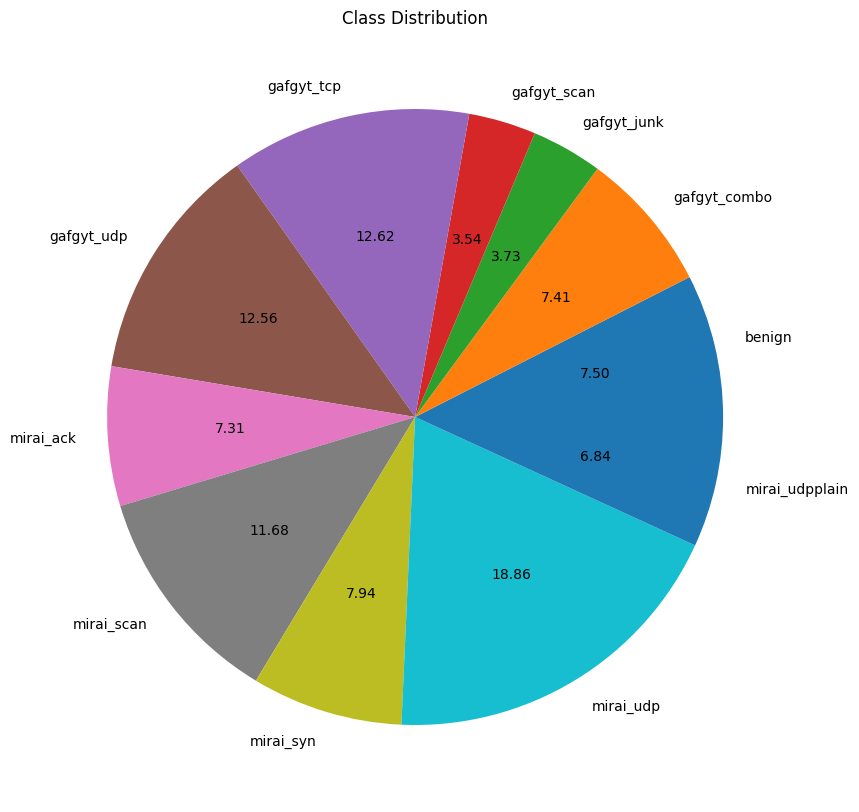

In [40]:
from matplotlib import pyplot as plt

plt.title("Class Distribution")
df.groupby("type").size().plot(kind='pie', autopct='%.2f', figsize=(20,10))

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828260 entries, 0 to 828259
Columns: 116 entries, MI_dir_L5_weight to type
dtypes: float64(115), object(1)
memory usage: 733.0+ MB


In [42]:
df = df.sample(frac=1).reset_index(drop=True)

In [43]:
df.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,60.750651,213.665366,54141.432712,78.730852,252.834859,60387.246659,239.334011,309.543874,63985.094885,2823.387134,...,0.000000e+00,0.000000e+00,1.0000,60.0,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,mirai_ack
1,174.973402,74.067796,1.622525,288.180114,74.060861,1.467828,841.421805,74.077403,21.691225,6157.402083,...,0.000000e+00,0.000000e+00,1.0000,74.0,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,gafgyt_combo
2,1.000000,60.000000,0.000005,1.000029,60.000376,0.004887,1.037936,60.402249,5.370273,4.164557,...,-1.120000e-29,-2.460000e-17,6.1943,60.0,9.540000e-07,84.852814,1.020000e-12,-8.830000e-30,-1.370000e-17,benign
3,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,1.0000,60.0,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,gafgyt_udp
4,186.609416,294.531093,63661.345427,276.332709,317.430552,63980.400705,558.913981,340.189080,63254.989923,3392.086386,...,0.000000e+00,0.000000e+00,1.0000,60.0,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,mirai_ack


In [44]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["type"])

In [45]:
features = list(train_df.columns)
features.remove("type")
#features

In [46]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df["type"] = label_encoder.fit_transform(train_df["type"])
test_df["type"] = label_encoder.transform(test_df["type"])

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])

In [48]:
X_train = train_df[features].values
y_train = train_df["type"].values

X_test = test_df[features].values
y_test = test_df["type"].values

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


clf = ExtraTreesClassifier(n_estimators=50, n_jobs=-1)
clf = clf.fit(X_train, y_train)
clf.feature_importances_  

array([5.20636443e-03, 5.76118139e-03, 6.34499478e-03, 1.37734473e-02,
       5.03404806e-03, 1.43671484e-03, 1.00870304e-02, 1.60376384e-02,
       1.53618733e-02, 3.45842507e-02, 4.11652751e-02, 1.67482788e-02,
       3.65576323e-02, 5.52701913e-02, 4.34139928e-02, 4.35040676e-03,
       3.32666044e-03, 1.62211842e-03, 9.55069487e-03, 8.54181109e-03,
       9.79023737e-03, 2.66249651e-02, 1.38984362e-02, 2.49416625e-02,
       2.63127776e-02, 2.10166681e-02, 2.28196795e-02, 4.28869147e-02,
       3.80807499e-02, 3.41580818e-02, 5.03083955e-03, 2.46215644e-03,
       2.59518684e-04, 6.48770460e-03, 4.16047978e-05, 4.65859560e-07,
       3.62797864e-06, 8.29008123e-03, 2.10266392e-03, 8.54272306e-04,
       1.57247516e-03, 6.14821263e-04, 6.31265882e-05, 1.82250111e-05,
       1.05558782e-02, 4.08899394e-03, 2.16669644e-03, 5.21671178e-03,
       3.36012830e-04, 4.31275138e-04, 4.59349403e-04, 1.08149356e-02,
       7.31615218e-03, 2.23477689e-03, 9.58828772e-03, 1.12419051e-03,
      

In [50]:
ext=pd.DataFrame(clf.feature_importances_,columns=["extratrees_importance"])
ext = ext.sort_values(['extratrees_importance'], ascending=False)
feature_index = [features[i] for i in list(ext.index)]
ext["Feature_Name"] = feature_index
ext

,extratrees_importance,Feature_Name
13,5.527019e-02,MI_dir_L0.01_mean
72,4.342128e-02,HH_jit_L1_mean
14,4.341399e-02,MI_dir_L0.01_variance
27,4.288691e-02,H_L0.01_weight
10,4.116528e-02,MI_dir_L0.1_mean
...,...,...
93,1.218031e-06,HpHp_L3_pcc
99,1.081068e-06,HpHp_L1_covariance
106,7.875935e-07,HpHp_L0.1_covariance
35,4.658596e-07,HH_L5_covariance


In [51]:
model = SelectFromModel(clf, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)
X_test.shape 

(165652, 32)

In [52]:
X_train = X_train.reshape((-1, X_train.shape[-1], 1))
X_test = X_test.reshape((-1, X_test.shape[-1], 1))

In [53]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)

class_weights = {k: v for k,v in enumerate(class_weights)}
class_weights

{0: 1.2114532692937052,
 1: 1.2267247252584497,
 2: 2.43697268828752,
 3: 2.5700610508187944,
 4: 0.7204704204034411,
 5: 0.7239251872885254,
 6: 1.2434632642299384,
 7: 0.7780056946605219,
 8: 1.1452571612276539,
 9: 0.48190443774373115,
 10: 1.3284174861416012}

In [54]:
input_shape = X_train.shape[1:]
nb_classes = len(label_encoder.classes_)

In [55]:
from tensorflow.keras.utils import to_categorical
import os

os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

def convert_to_categorical(y, nb_classes):
    return to_categorical(y, num_classes=nb_classes)

In [56]:
def iid_data_indices(labels: np.ndarray, nb_clients: int):
    data_len = len(labels)
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    chunks = np.array_split(indices, nb_clients)
    return chunks

In [57]:
def non_iid_data_indices(labels: np.ndarray, nb_clients: int, nb_shards: int = 200):
    data_len = len(labels)
    indices = np.arange(data_len)
    indices = indices[labels.argsort()]
    shards = np.array_split(indices, nb_shards)
    random.shuffle(shards)
    shards_for_users = np.array_split(shards, nb_clients)
    indices_for_users = [np.hstack(x) for x in shards_for_users]
    return indices_for_users

In [58]:
def sample(y:np.ndarray, sampling_technique: str, nb_clients: int):
    if sampling_technique.lower() == "iid":
        sampler_fn = iid_data_indices
    else:
        sampler_fn = non_iid_data_indices
    client_data_indices = sampler_fn(y, nb_clients)
    return client_data_indices

In [59]:
def assign_data_to_clients(clients: dict, X:np.ndarray, y:np.ndarray, nb_classes:int, sampling_technique: str):
    sampled_data_indices = sample(y, sampling_technique, len(clients.keys()))
    for client_name, data_indices in zip(clients.keys(), sampled_data_indices):
        X = X_train[data_indices]
        y = y_train[data_indices]
        y = convert_to_categorical(y, nb_classes)
        clients[client_name] = list(zip(X, y))
    return clients

In [60]:
def create_clients(X, y, nb_classes, sampling_technique, num_clients=10, initial='clients'):
    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]
    clients = {client_names[i] : [] for i in range(len(client_names))}
    return assign_data_to_clients(clients, X, y, nb_classes, sampling_technique)

In [61]:
import tensorflow as tf

def batch_data(data_shard, batch_size=64):
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    del data_shard

    len_label = len(label)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    del data, label
    return dataset.shuffle(len_label).batch(batch_size)

In [62]:
from keras.layers import Conv1D, MaxPool1D, BatchNormalization, Activation, Input, Add, \
                         GlobalAveragePooling1D, Dense, concatenate
from keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.metrics import Recall, Precision
import keras
import time
import os

In [63]:
import keras.backend as K
import tensorflow as tf

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [64]:
from keras import layers
from keras.layers import Conv1D, MaxPooling1D, Concatenate, Activation, BatchNormalization

class INCEPTION_Block(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(INCEPTION_Block, self).__init__(**kwargs)
        self.kernel_size = 50
#         f1, f2_in, f2_out, f3_in, f3_out, f4_out = (128, 128, 192, 32, 96, 64)
        f1, f2_in, f2_out, f3_in, f3_out, f4_out = (16, 16, 24, 4, 12, 8)
        kernel_size_s = [10, 30, 50]
        
        # 1x1 conv
        self.conv_1_1 = Conv1D(f1, kernel_size_s[0], padding='same', activation='relu')
        
        # 3x3 conv
        self.conv_1_2 = Conv1D(f2_in, kernel_size_s[0], padding='same', activation='relu')
        self.conv_3_2 = Conv1D(f2_out, kernel_size_s[1], padding='same', activation='relu')
        
        # 5x5 conv
        self.conv_1_3 = Conv1D(f3_in, kernel_size_s[0], padding='same', activation='relu')
        self.conv_5_3 = Conv1D(f3_out, kernel_size_s[2], padding='same', activation='relu')
        
        # 3x3 max pooling
        self.pool = MaxPooling1D(kernel_size_s[1], strides=1, padding='same')
        self.conv_final = Conv1D(f4_out, kernel_size_s[0], padding='same', activation='relu')
        
        # concatenate filters, assumes filters/channels last
        self.concatenate = Concatenate(axis=-1)
        
        self.batch_normalization = BatchNormalization()
        self.relu_activation = Activation(activation='relu')
        
    def call(self, layer_in):
        # 1x1 conv
        conv1 = self.conv_1_1(layer_in)
        
        # 3x3 conv
        conv3 = self.conv_1_2(layer_in)
        conv3 = self.conv_3_2(conv3)
        
        # 5x5 conv
        conv5 = self.conv_1_3(layer_in)
        conv5 = self.conv_5_3(conv5)
        
        # 3x3 max pooling
        pool = self.pool(layer_in)
        pool = self.conv_final(pool)
        
        # concatenate filters, assumes filters/channels last
        layer_out = self.concatenate([conv1, conv3, conv5, pool])
        
        layer_out = self.batch_normalization(layer_out)
        layer_out = self.relu_activation(layer_out)
        
        return layer_out

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = keras.models.Sequential(
        [INCEPTION_Block(),
         INCEPTION_Block(),
         INCEPTION_Block()])(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

class TransformerEncoder(layers.Layer):
    def __init__(self, head_size, num_heads, neurons):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=head_size)
        self.ffn = keras.models.Sequential(
            #[layers.Dense(neurons, activation="relu"), layers.Dense(head_size),]
            [
                INCEPTION_Block(),
                INCEPTION_Block(),
                INCEPTION_Block(),
            ]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.1)
        self.dropout2 = layers.Dropout(0.1)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

def get_model(input_shape, nb_classes) -> tf.keras.Model:
    head_size=64 # Embedding size for attention
    num_heads=3 # Number of attention heads
    ff_dim=128 # Hidden layer size in feed forward network inside transformer
    num_transformer_blocks=1
    mlp_units=[32]
    mlp_dropout=0.1
    dropout=0.1

    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(nb_classes, activation="softmax")(x)

    return keras.Model(inputs, outputs)

In [65]:
from keras.metrics import Recall, Precision
from keras.utils.vis_utils import plot_model

learning_rate = 1e-2
comms_round = 10
loss='categorical_crossentropy'
metrics = ["accuracy", Recall(), Precision(), f1_score]
optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=learning_rate)

#initialize global model
global_model = get_model(input_shape, nb_classes)

global_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 32, 1)]      0           []                               
                                                                                                  
 multi_head_attention_11 (Multi  (None, 32, 1)       1345        ['input_12[0][0]',               
 HeadAttention)                                                   'input_12[0][0]']               
                                                                                                  
 dropout_33 (Dropout)           (None, 32, 1)        0           ['multi_head_attention_11[0][0]']
                                                                                                  
 layer_normalization_22 (LayerN  (None, 32, 1)       2           ['dropout_33[0][0]']      

In [66]:
plot_model(global_model, to_file='global_model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [67]:
BATCH_SIZE = 64
sampling_technique = "iid"

# create clients
clients_batched = create_clients(X_train, y_train, nb_classes, sampling_technique, num_clients=10, initial='client')

# del X_train, y_train

# process and batch the training data for each client
client_set = {k: {} for k in clients_batched.keys()}

for (client_name, data) in clients_batched.items():
    client_set[client_name]["dataset"] = batch_data(data, BATCH_SIZE)
    local_model = get_model(input_shape, nb_classes)
    local_model.compile(loss=loss, 
                      optimizer=optimizer, 
                      metrics=metrics)
    client_set[client_name]["model"] = local_model

In [68]:
#process and batch the test set 

y_test = convert_to_categorical(y_test, nb_classes)

test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

# del X_test, y_test

------------------------------------------------
# Matteo test data

In [71]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)

print("y_train", y_train.shape)
print("y_test", y_test.shape)

i = 0
for (x_batch, y_batch) in test_batched:
    i += 1
    print("(x_batch, y_batch)", (x_batch, y_batch))
print(i)

X_train (662608, 32, 1)
X_test (165652, 32, 1)
y_train (662608,)
y_test (165652, 11)
(x_batch, y_batch) (<tf.Tensor: shape=(165652, 32, 1), dtype=float64, numpy=
array([[[2.27585779e-01],
        [2.54000648e-01],
        [1.71395265e-04],
        ...,
        [0.00000000e+00],
        [9.99996048e-01],
        [9.99996048e-01]],

       [[4.10697135e-03],
        [2.94100825e-03],
        [8.15729401e-10],
        ...,
        [2.27969977e-05],
        [1.87264820e-08],
        [2.39875342e-08]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [1.38777878e-17],
        ...,
        [0.00000000e+00],
        [9.98841915e-01],
        [9.98841915e-01]],

       ...,

       [[4.84603677e-01],
        [8.27829600e-01],
        [2.16088936e-02],
        ...,
        [9.16251323e-01],
        [8.13175504e-06],
        [4.08021092e-05]],

       [[3.24073173e-01],
        [4.29952449e-01],
        [5.64643141e-03],
        ...,
        [0.00000000e+00],
        [9.99998414e-01]

In [80]:
(unique, counts) = np.unique(y_train, return_counts=True)
(unique, counts)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 49723,  49104,  24718,  23438,  83608,  83209,  48443,  77425,
         52597, 124998,  45345]))

In [81]:
(unique, counts) = np.unique(y_test, return_counts=True)
(unique, counts)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([12431, 12276,  6180,  5859, 20902, 20802, 12111, 19356, 13149,
        31250, 11336]))

In [151]:
BATCH_SIZE = 64
sampling_technique = "iid"

# create clients
clients_batched = create_clients(X_train, y_train, nb_classes, sampling_technique, num_clients=10, initial='client')

def create_small_batches(clients_batched_standard, percentage_small=0.5, how_small = 0.1):
    new_batches_with_small_clients = {}
    for index, client_name in enumerate(clients_batched_standard.keys()):
        if index in range(int(len(clients_batched_standard.keys())*percentage_small)):
#             small clients
            new_batches_with_small_clients[client_name] = clients_batched_standard[client_name][:int(len(clients_batched_standard[client_name])*how_small)]
#             normal clients
        else:        
            new_batches_with_small_clients[client_name] = clients_batched_standard[client_name]
    return new_batches_with_small_clients
            


In [152]:
for client_name in clients_batched.keys():
    print(client_name, len(clients_batched[client_name]))

client_1 66261
client_2 66261
client_3 66261
client_4 66261
client_5 66261
client_6 66261
client_7 66261
client_8 66261
client_9 66260
client_10 66260


In [153]:
clients_batched_with_small = create_small_batches(clients_batched)

In [154]:
for client_name in clients_batched_with_small.keys():
    print(client_name, len(clients_batched_with_small[client_name]))

client_1 6626
client_2 6626
client_3 6626
client_4 6626
client_5 6626
client_6 66261
client_7 66261
client_8 66261
client_9 66260
client_10 66260


-----------------------------------------

# Evaluate the model

In [70]:
X_test.shape

(165652, 33, 1)

In [35]:
def weight_scalling_factor(clients, client_name):
    client_names = list(clients.keys())
    #get the bs
    bs = list(clients[client_name]["dataset"])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients[client_name]["dataset"]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients[client_name]["dataset"]).numpy()*bs
    return local_count/global_count

In [36]:
def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final

In [37]:
def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)
        
    return avg_grad

In [38]:
from sklearn.metrics import accuracy_score

def test_model(X_test, y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    loss = cce(y_test, logits)
    y_hat = np.argmax(logits, axis=1)
    y_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(logits, axis=1))
    
    r = Recall()
    r.update_state(y_test, logits)
    recall = r.result().numpy()
    
    p = Precision()
    p.update_state(y_test, logits)
    precision = p.result().numpy()
    
    f = f1_score(y_test, logits)
    f1 = f.numpy()
    
    print('comm_round: {} | global_loss: {} | global_accuracy: {:.4} | global_recall: {:.4} | global_precision: {:.4} | global_f1_score: {:.4} \n'.format(comm_round, loss, accuracy, recall, precision, f1))
    return loss, accuracy, precision, recall, f1

In [39]:
def train_client(client, global_weights, class_weights):
    client_set[client]["model"] = client_set[client]["model"]

    #set local model weight to the weight of the global model
    client_set[client]["model"].set_weights(global_weights)

    #fit local model with client's data
    print(f"Round: {comm_round} | Client: {client} training")
    client_set[client]["model"].fit(client_set[client]["dataset"], epochs=1, verbose=1, class_weight=class_weights)

    #scale the model weights and add to list
    scaling_factor = weight_scalling_factor(client_set, client)
    scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
    return scaled_weights

In [40]:
import random 

#commence global training loop
global_loss=[]
global_accuracy=[]
global_precision=[]
global_recall=[]
global_f1=[]
best_global_accuracy = 0

for comm_round in range(comms_round):            
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(client_set.keys())
    random.shuffle(client_names)
    
    #loop through each client and create new local model
    for client in client_names:            
        scaled_weights = train_client(client, global_weights, class_weights)
            
        scaled_local_weight_list.append(scaled_weights)
        
    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    
    #update global model 
    global_model.set_weights(average_weights)

    #test global model and print out metrics after each communications round
    g_accuracy = 0
    for(x_batch, y_batch) in test_batched:
        g_loss, g_accuracy, g_precision, g_recall, g_f1 = test_model(x_batch, y_batch, global_model, comm_round)
        global_loss.append(g_loss)
        global_accuracy.append(g_accuracy)
        global_precision.append(g_precision)
        global_recall.append(g_recall)
        global_f1.append(g_f1)
        
    if g_accuracy > best_global_accuracy:
        best_global_accuracy = g_accuracy
        global_model.save_weights('global_model_best_weights.h5')
        print("New Weights Saved")

Round: 0 | Client: client_3 training


2023-04-05 11:18:17.787756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:18:17.787916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:18:20.533951: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-04-05 11:18:20.623475: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8801


1036/1036 [==============================] - 11s 7ms/step - loss: 0.4213 - accuracy: 0.7683 - recall: 0.7335 - precision: 0.7904 - f1_score: 0.7537


2023-04-05 11:18:28.848747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:18:28.848911: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


Round: 0 | Client: client_8 training


2023-04-05 11:18:29.078754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:18:29.078919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 9s 6ms/step - loss: 0.4268 - accuracy: 0.7658 - recall: 0.7321 - precision: 0.7889 - f1_score: 0.7510
Round: 0 | Client: client_9 training


2023-04-05 11:18:37.668077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:18:37.668266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:18:37.823978: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shap

1036/1036 [==============================] - 9s 7ms/step - loss: 0.4236 - accuracy: 0.7676 - recall: 0.7317 - precision: 0.7895 - f1_score: 0.7513
Round: 0 | Client: client_1 training


2023-04-05 11:18:47.158636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66260,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:18:47.158822: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66260,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:18:47.315846: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape

1036/1036 [==============================] - 9s 6ms/step - loss: 0.4307 - accuracy: 0.7649 - recall: 0.7307 - precision: 0.7892 - f1_score: 0.7489
Round: 0 | Client: client_4 training


2023-04-05 11:18:55.927969: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:18:55.928156: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:18:56.091909: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and s

1036/1036 [==============================] - 9s 6ms/step - loss: 0.4254 - accuracy: 0.7647 - recall: 0.7304 - precision: 0.7888 - f1_score: 0.7497
Round: 0 | Client: client_7 training


2023-04-05 11:19:04.782409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:19:04.782581: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:19:04.940716: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shap

1036/1036 [==============================] - 9s 6ms/step - loss: 0.4232 - accuracy: 0.7675 - recall: 0.7303 - precision: 0.7893 - f1_score: 0.7517
Round: 0 | Client: client_10 training


2023-04-05 11:19:13.798712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:19:13.798893: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:19:13.957562: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape

1036/1036 [==============================] - 9s 6ms/step - loss: 0.4237 - accuracy: 0.7666 - recall: 0.7302 - precision: 0.7894 - f1_score: 0.7517
Round: 0 | Client: client_5 training


2023-04-05 11:19:22.577389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66260,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:19:22.577558: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66260,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:19:22.756987: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape

1036/1036 [==============================] - 9s 6ms/step - loss: 0.4237 - accuracy: 0.7675 - recall: 0.7301 - precision: 0.7897 - f1_score: 0.7509
Round: 0 | Client: client_2 training


2023-04-05 11:19:31.300126: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:19:31.300296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:19:31.455083: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape

1036/1036 [==============================] - 9s 6ms/step - loss: 0.4211 - accuracy: 0.7688 - recall: 0.7303 - precision: 0.7899 - f1_score: 0.7529
Round: 0 | Client: client_6 training


2023-04-05 11:19:40.219994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:19:40.220163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:19:40.399349: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape 

1036/1036 [==============================] - 9s 6ms/step - loss: 0.4267 - accuracy: 0.7632 - recall: 0.7300 - precision: 0.7896 - f1_score: 0.7476


2023-04-05 11:19:48.942250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:19:48.942415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:19:49.231226: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape 

5177/5177 [==============================] - 7s 1ms/step
comm_round: 0 | global_loss: 2.126438617706299 | global_accuracy: 0.4396 | global_recall: 0.3159 | global_precision: 0.743 | global_f1_score: 0.4433 

New Weights Saved
Round: 1 | Client: client_5 training
   9/1036 [..............................] - ETA: 7s - loss: 0.6987 - accuracy: 0.7361 - recall: 0.5330 - precision: 0.8504 - f1_score: 0.6453  

2023-04-05 11:19:58.381892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:19:58.382073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.3463 - accuracy: 0.7940 - recall: 0.7768 - precision: 0.8051 - f1_score: 0.7899
Round: 1 | Client: client_3 training
  17/1036 [..............................] - ETA: 6s - loss: 0.6491 - accuracy: 0.7206 - recall: 0.5542 - precision: 0.8040 - f1_score: 0.6483

2023-04-05 11:20:05.256096: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:20:05.256271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.3514 - accuracy: 0.7934 - recall: 0.7737 - precision: 0.8059 - f1_score: 0.7886
Round: 1 | Client: client_1 training
  17/1036 [..............................] - ETA: 6s - loss: 0.6551 - accuracy: 0.7022 - recall: 0.5404 - precision: 0.8293 - f1_score: 0.6474

2023-04-05 11:20:12.129374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:20:12.129559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.3479 - accuracy: 0.7939 - recall: 0.7754 - precision: 0.8058 - f1_score: 0.7895
Round: 1 | Client: client_8 training
  18/1036 [..............................] - ETA: 6s - loss: 0.6408 - accuracy: 0.7188 - recall: 0.5434 - precision: 0.8358 - f1_score: 0.6479

2023-04-05 11:20:18.929653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:20:18.929842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.3515 - accuracy: 0.7959 - recall: 0.7763 - precision: 0.8081 - f1_score: 0.7908
Round: 1 | Client: client_4 training
   9/1036 [..............................] - ETA: 6s - loss: 0.8043 - accuracy: 0.7118 - recall: 0.4983 - precision: 0.7820 - f1_score: 0.5967  

2023-04-05 11:20:25.680525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:20:25.680700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.3475 - accuracy: 0.7961 - recall: 0.7774 - precision: 0.8080 - f1_score: 0.7914
Round: 1 | Client: client_6 training
   9/1036 [..............................] - ETA: 6s - loss: 0.7874 - accuracy: 0.6649 - recall: 0.4514 - precision: 0.7784 - f1_score: 0.5637  

2023-04-05 11:20:32.525357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:20:32.525536: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.3548 - accuracy: 0.7914 - recall: 0.7731 - precision: 0.8044 - f1_score: 0.7877
Round: 1 | Client: client_10 training
  17/1036 [..............................] - ETA: 6s - loss: 0.6439 - accuracy: 0.7390 - recall: 0.5864 - precision: 0.8439 - f1_score: 0.6856

2023-04-05 11:20:39.356956: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:20:39.357140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66260,34,1]
	 [[{{node Placeholder/_0}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.3456 - accuracy: 0.7957 - recall: 0.7771 - precision: 0.8087 - f1_score: 0.7917
Round: 1 | Client: client_7 training
  18/1036 [..............................] - ETA: 6s - loss: 0.6402 - accuracy: 0.7352 - recall: 0.5556 - precision: 0.8466 - f1_score: 0.6620

2023-04-05 11:20:46.185870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:20:46.186071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.3435 - accuracy: 0.7957 - recall: 0.7781 - precision: 0.8068 - f1_score: 0.7914
Round: 1 | Client: client_2 training
  17/1036 [..............................] - ETA: 6s - loss: 0.6548 - accuracy: 0.7169 - recall: 0.5708 - precision: 0.8054 - f1_score: 0.6601

2023-04-05 11:20:53.015857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:20:53.016044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.3491 - accuracy: 0.7934 - recall: 0.7745 - precision: 0.8061 - f1_score: 0.7891
Round: 1 | Client: client_9 training
  17/1036 [..............................] - ETA: 6s - loss: 0.6109 - accuracy: 0.7344 - recall: 0.5533 - precision: 0.8563 - f1_score: 0.6625

2023-04-05 11:20:59.836993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66260,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:20:59.837182: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66260,34,1]
	 [[{{node Placeholder/_0}}]]


5177/5177 [==============================] - 8s 2ms/step
comm_round: 1 | global_loss: 1.7492817640304565 | global_accuracy: 0.794 | global_recall: 0.7915 | global_precision: 0.7957 | global_f1_score: 0.7936 

New Weights Saved
Round: 2 | Client: client_6 training
  17/1036 [..............................] - ETA: 6s - loss: 0.3160 - accuracy: 0.8051 - recall: 0.8024 - precision: 0.8083 - f1_score: 0.8053

2023-04-05 11:21:15.750110: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:21:15.750291: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.2987 - accuracy: 0.8136 - recall: 0.8079 - precision: 0.8174 - f1_score: 0.8125
Round: 2 | Client: client_2 training
  17/1036 [..............................] - ETA: 6s - loss: 0.3502 - accuracy: 0.7941 - recall: 0.7858 - precision: 0.7998 - f1_score: 0.7926

2023-04-05 11:21:22.619178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:21:22.619422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.2956 - accuracy: 0.8137 - recall: 0.8091 - precision: 0.8180 - f1_score: 0.8133
Round: 2 | Client: client_7 training
  17/1036 [..............................] - ETA: 6s - loss: 0.3368 - accuracy: 0.7757 - recall: 0.7721 - precision: 0.7792 - f1_score: 0.7756

2023-04-05 11:21:29.431394: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:21:29.431608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.2899 - accuracy: 0.8152 - recall: 0.8108 - precision: 0.8184 - f1_score: 0.8145
Round: 2 | Client: client_5 training
  17/1036 [..............................] - ETA: 6s - loss: 0.3223 - accuracy: 0.7950 - recall: 0.7812 - precision: 0.7996 - f1_score: 0.7903

2023-04-05 11:21:36.238233: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:21:36.238471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.2938 - accuracy: 0.8155 - recall: 0.8111 - precision: 0.8184 - f1_score: 0.8147
Round: 2 | Client: client_10 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2790 - accuracy: 0.8162 - recall: 0.8097 - precision: 0.8188 - f1_score: 0.8143

2023-04-05 11:21:43.142243: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:21:43.142427: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66260,34,1]
	 [[{{node Placeholder/_0}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.2908 - accuracy: 0.8156 - recall: 0.8107 - precision: 0.8191 - f1_score: 0.8148
Round: 2 | Client: client_4 training
   9/1036 [..............................] - ETA: 7s - loss: 0.2921 - accuracy: 0.8125 - recall: 0.8073 - precision: 0.8144 - f1_score: 0.8107  

2023-04-05 11:21:49.980355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:21:49.980569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.2927 - accuracy: 0.8179 - recall: 0.8141 - precision: 0.8210 - f1_score: 0.8174
Round: 2 | Client: client_1 training
  16/1036 [..............................] - ETA: 7s - loss: 0.2840 - accuracy: 0.8213 - recall: 0.8174 - precision: 0.8222 - f1_score: 0.8197

2023-04-05 11:21:56.848510: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:21:56.848694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.2953 - accuracy: 0.8153 - recall: 0.8107 - precision: 0.8196 - f1_score: 0.8151
Round: 2 | Client: client_3 training
   9/1036 [..............................] - ETA: 6s - loss: 0.3051 - accuracy: 0.7986 - recall: 0.7743 - precision: 0.8051 - f1_score: 0.7892  

2023-04-05 11:22:03.677958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:22:03.678140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.2951 - accuracy: 0.8165 - recall: 0.8111 - precision: 0.8199 - f1_score: 0.8155
Round: 2 | Client: client_8 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2926 - accuracy: 0.8125 - recall: 0.8070 - precision: 0.8130 - f1_score: 0.8099

2023-04-05 11:22:10.570153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:22:10.570333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.2983 - accuracy: 0.8147 - recall: 0.8095 - precision: 0.8183 - f1_score: 0.8139
Round: 2 | Client: client_9 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2945 - accuracy: 0.8171 - recall: 0.8088 - precision: 0.8209 - f1_score: 0.8148

2023-04-05 11:22:17.439031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66260,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:22:17.439240: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


5177/5177 [==============================] - 9s 2ms/step
comm_round: 2 | global_loss: 1.713060975074768 | global_accuracy: 0.8325 | global_recall: 0.8323 | global_precision: 0.8327 | global_f1_score: 0.8325 

New Weights Saved
Round: 3 | Client: client_1 training
  18/1036 [..............................] - ETA: 6s - loss: 0.2692 - accuracy: 0.8238 - recall: 0.8160 - precision: 0.8370 - f1_score: 0.8257

2023-04-05 11:22:34.156520: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:22:34.156697: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.2806 - accuracy: 0.8225 - recall: 0.8179 - precision: 0.8261 - f1_score: 0.8218
Round: 3 | Client: client_2 training
  18/1036 [..............................] - ETA: 6s - loss: 0.2654 - accuracy: 0.8203 - recall: 0.8177 - precision: 0.8220 - f1_score: 0.8198

2023-04-05 11:22:40.997333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:22:40.997511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.2783 - accuracy: 0.8221 - recall: 0.8195 - precision: 0.8245 - f1_score: 0.8220
Round: 3 | Client: client_10 training
  18/1036 [..............................] - ETA: 6s - loss: 0.2844 - accuracy: 0.8316 - recall: 0.8255 - precision: 0.8335 - f1_score: 0.8295

2023-04-05 11:22:47.924113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66260,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:22:47.924287: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66260,34,1]
	 [[{{node Placeholder/_0}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2757 - accuracy: 0.8259 - recall: 0.8219 - precision: 0.8289 - f1_score: 0.8254
Round: 3 | Client: client_8 training
  15/1036 [..............................] - ETA: 7s - loss: 0.3238 - accuracy: 0.8125 - recall: 0.8083 - precision: 0.8151 - f1_score: 0.8117

2023-04-05 11:22:54.916421: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:22:54.916629: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.2848 - accuracy: 0.8234 - recall: 0.8195 - precision: 0.8262 - f1_score: 0.8228
Round: 3 | Client: client_5 training
  18/1036 [..............................] - ETA: 6s - loss: 0.2717 - accuracy: 0.8229 - recall: 0.8186 - precision: 0.8250 - f1_score: 0.8218

2023-04-05 11:23:01.833232: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:23:01.833405: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.2808 - accuracy: 0.8232 - recall: 0.8194 - precision: 0.8261 - f1_score: 0.8227
Round: 3 | Client: client_4 training
  17/1036 [..............................] - ETA: 7s - loss: 0.3348 - accuracy: 0.8162 - recall: 0.8107 - precision: 0.8174 - f1_score: 0.8140

2023-04-05 11:23:08.749687: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:23:08.749856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.2786 - accuracy: 0.8213 - recall: 0.8177 - precision: 0.8241 - f1_score: 0.8208
Round: 3 | Client: client_7 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2736 - accuracy: 0.8382 - recall: 0.8346 - precision: 0.8384 - f1_score: 0.8365

2023-04-05 11:23:15.698541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:23:15.698757: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2761 - accuracy: 0.8246 - recall: 0.8218 - precision: 0.8268 - f1_score: 0.8241
Round: 3 | Client: client_3 training
   8/1036 [..............................] - ETA: 7s - loss: 0.2420 - accuracy: 0.8164 - recall: 0.8164 - precision: 0.8180 - f1_score: 0.8172  

2023-04-05 11:23:22.699578: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:23:22.699755: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 6ms/step - loss: 0.2786 - accuracy: 0.8225 - recall: 0.8185 - precision: 0.8260 - f1_score: 0.8222
Round: 3 | Client: client_9 training
  16/1036 [..............................] - ETA: 7s - loss: 0.2585 - accuracy: 0.8398 - recall: 0.8369 - precision: 0.8485 - f1_score: 0.8426

2023-04-05 11:23:29.719440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:23:29.719637: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2802 - accuracy: 0.8250 - recall: 0.8214 - precision: 0.8287 - f1_score: 0.8248
Round: 3 | Client: client_6 training
  17/1036 [..............................] - ETA: 7s - loss: 0.3163 - accuracy: 0.8116 - recall: 0.8015 - precision: 0.8150 - f1_score: 0.8083

2023-04-05 11:23:37.288103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:23:37.288283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


5177/5177 [==============================] - 7s 1ms/step
comm_round: 3 | global_loss: 1.7094439268112183 | global_accuracy: 0.8384 | global_recall: 0.8383 | global_precision: 0.8384 | global_f1_score: 0.8384 

New Weights Saved
Round: 4 | Client: client_8 training
   9/1036 [..............................] - ETA: 6s - loss: 0.2708 - accuracy: 0.8177 - recall: 0.8160 - precision: 0.8188 - f1_score: 0.8173  

2023-04-05 11:23:52.282777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:23:52.282945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2739 - accuracy: 0.8280 - recall: 0.8250 - precision: 0.8304 - f1_score: 0.8277
Round: 4 | Client: client_10 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2376 - accuracy: 0.8373 - recall: 0.8364 - precision: 0.8379 - f1_score: 0.8371

2023-04-05 11:23:59.307278: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66260,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:23:59.307451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66260,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2652 - accuracy: 0.8285 - recall: 0.8257 - precision: 0.8312 - f1_score: 0.8283
Round: 4 | Client: client_1 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2687 - accuracy: 0.8447 - recall: 0.8410 - precision: 0.8480 - f1_score: 0.8444

2023-04-05 11:24:06.564713: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:24:06.564887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2672 - accuracy: 0.8296 - recall: 0.8268 - precision: 0.8317 - f1_score: 0.8293
Round: 4 | Client: client_9 training
   9/1036 [..............................] - ETA: 7s - loss: 0.2718 - accuracy: 0.8559 - recall: 0.8559 - precision: 0.8559 - f1_score: 0.8559  

2023-04-05 11:24:13.677290: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66260,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:24:13.677456: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66260,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2687 - accuracy: 0.8291 - recall: 0.8257 - precision: 0.8320 - f1_score: 0.8288
Round: 4 | Client: client_5 training
  16/1036 [..............................] - ETA: 7s - loss: 0.2322 - accuracy: 0.8447 - recall: 0.8447 - precision: 0.8464 - f1_score: 0.8455

2023-04-05 11:24:20.803357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:24:20.803555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2697 - accuracy: 0.8259 - recall: 0.8229 - precision: 0.8285 - f1_score: 0.8255
Round: 4 | Client: client_6 training
  17/1036 [..............................] - ETA: 6s - loss: 0.3082 - accuracy: 0.8290 - recall: 0.8290 - precision: 0.8313 - f1_score: 0.8302

2023-04-05 11:24:27.923157: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:24:27.923319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2716 - accuracy: 0.8270 - recall: 0.8239 - precision: 0.8295 - f1_score: 0.8267
Round: 4 | Client: client_7 training
   9/1036 [..............................] - ETA: 6s - loss: 0.2766 - accuracy: 0.8212 - recall: 0.8212 - precision: 0.8269 - f1_score: 0.8240  

2023-04-05 11:24:35.035684: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:24:35.035867: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2655 - accuracy: 0.8285 - recall: 0.8259 - precision: 0.8311 - f1_score: 0.8285
Round: 4 | Client: client_4 training
   9/1036 [..............................] - ETA: 6s - loss: 0.2535 - accuracy: 0.8264 - recall: 0.8264 - precision: 0.8293 - f1_score: 0.8278  

2023-04-05 11:24:42.243862: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:24:42.244089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2670 - accuracy: 0.8287 - recall: 0.8254 - precision: 0.8310 - f1_score: 0.8281
Round: 4 | Client: client_2 training
   9/1036 [..............................] - ETA: 7s - loss: 0.3243 - accuracy: 0.8108 - recall: 0.8056 - precision: 0.8140 - f1_score: 0.8097  

2023-04-05 11:24:49.269810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:24:49.269976: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2679 - accuracy: 0.8256 - recall: 0.8225 - precision: 0.8285 - f1_score: 0.8253
Round: 4 | Client: client_3 training
   8/1036 [..............................] - ETA: 7s - loss: 0.2531 - accuracy: 0.8359 - recall: 0.8320 - precision: 0.8353 - f1_score: 0.8338  

2023-04-05 11:24:56.381689: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:24:56.381856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]


5177/5177 [==============================] - 7s 1ms/step
comm_round: 4 | global_loss: 1.7048382759094238 | global_accuracy: 0.8345 | global_recall: 0.8343 | global_precision: 0.8347 | global_f1_score: 0.8345 

Round: 5 | Client: client_4 training
  16/1036 [..............................] - ETA: 7s - loss: 0.2732 - accuracy: 0.8320 - recall: 0.8242 - precision: 0.8373 - f1_score: 0.8307

2023-04-05 11:25:11.759545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:25:11.759704: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2572 - accuracy: 0.8337 - recall: 0.8309 - precision: 0.8364 - f1_score: 0.8336
Round: 5 | Client: client_2 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2668 - accuracy: 0.8373 - recall: 0.8327 - precision: 0.8412 - f1_score: 0.8370

2023-04-05 11:25:18.926691: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:25:18.926851: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2567 - accuracy: 0.8334 - recall: 0.8298 - precision: 0.8361 - f1_score: 0.8329
Round: 5 | Client: client_8 training
   7/1036 [..............................] - ETA: 9s - loss: 0.2899 - accuracy: 0.8415 - recall: 0.8393 - precision: 0.8449 - f1_score: 0.8420  

2023-04-05 11:25:26.101753: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:25:26.101930: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2611 - accuracy: 0.8365 - recall: 0.8340 - precision: 0.8388 - f1_score: 0.8364
Round: 5 | Client: client_9 training
  16/1036 [..............................] - ETA: 7s - loss: 0.2685 - accuracy: 0.8105 - recall: 0.8066 - precision: 0.8130 - f1_score: 0.8098

2023-04-05 11:25:33.392741: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66260,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:25:33.392924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2580 - accuracy: 0.8340 - recall: 0.8310 - precision: 0.8365 - f1_score: 0.8338
Round: 5 | Client: client_3 training
  15/1036 [..............................] - ETA: 7s - loss: 0.2853 - accuracy: 0.8042 - recall: 0.8021 - precision: 0.8080 - f1_score: 0.8049

2023-04-05 11:25:40.625653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:25:40.625816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2591 - accuracy: 0.8311 - recall: 0.8275 - precision: 0.8342 - f1_score: 0.8307
Round: 5 | Client: client_10 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2754 - accuracy: 0.8382 - recall: 0.8355 - precision: 0.8393 - f1_score: 0.8373

2023-04-05 11:25:47.759128: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66260,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:25:47.759323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66260,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2551 - accuracy: 0.8346 - recall: 0.8315 - precision: 0.8375 - f1_score: 0.8344
Round: 5 | Client: client_6 training
  16/1036 [..............................] - ETA: 7s - loss: 0.2903 - accuracy: 0.8174 - recall: 0.8154 - precision: 0.8178 - f1_score: 0.8166

2023-04-05 11:25:55.092370: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:25:55.092535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2647 - accuracy: 0.8314 - recall: 0.8288 - precision: 0.8338 - f1_score: 0.8311
Round: 5 | Client: client_5 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2301 - accuracy: 0.8428 - recall: 0.8419 - precision: 0.8435 - f1_score: 0.8427

2023-04-05 11:26:02.199042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:26:02.199246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2573 - accuracy: 0.8349 - recall: 0.8321 - precision: 0.8370 - f1_score: 0.8345
Round: 5 | Client: client_1 training
   9/1036 [..............................] - ETA: 7s - loss: 0.2360 - accuracy: 0.8333 - recall: 0.8299 - precision: 0.8371 - f1_score: 0.8334  

2023-04-05 11:26:09.310798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:26:09.310966: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2610 - accuracy: 0.8340 - recall: 0.8315 - precision: 0.8365 - f1_score: 0.8339
Round: 5 | Client: client_7 training
  16/1036 [..............................] - ETA: 7s - loss: 0.2647 - accuracy: 0.8174 - recall: 0.8135 - precision: 0.8231 - f1_score: 0.8181

2023-04-05 11:26:16.343248: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:26:16.343418: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


5177/5177 [==============================] - 7s 1ms/step
comm_round: 5 | global_loss: 1.704671859741211 | global_accuracy: 0.8305 | global_recall: 0.8303 | global_precision: 0.8308 | global_f1_score: 0.8305 

Round: 6 | Client: client_2 training
   8/1036 [..............................] - ETA: 7s - loss: 0.2402 - accuracy: 0.8398 - recall: 0.8379 - precision: 0.8395 - f1_score: 0.8387  

2023-04-05 11:26:31.788796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:26:31.788954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2542 - accuracy: 0.8343 - recall: 0.8317 - precision: 0.8372 - f1_score: 0.8342
Round: 6 | Client: client_3 training
  17/1036 [..............................] - ETA: 7s - loss: 0.2516 - accuracy: 0.8419 - recall: 0.8410 - precision: 0.8433 - f1_score: 0.8421

2023-04-05 11:26:38.868302: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:26:38.868484: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2496 - accuracy: 0.8367 - recall: 0.8328 - precision: 0.8402 - f1_score: 0.8365
Round: 6 | Client: client_7 training
   8/1036 [..............................] - ETA: 7s - loss: 0.2834 - accuracy: 0.8262 - recall: 0.8242 - precision: 0.8258 - f1_score: 0.8250  

2023-04-05 11:26:46.057211: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:26:46.057380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2492 - accuracy: 0.8369 - recall: 0.8342 - precision: 0.8392 - f1_score: 0.8367
Round: 6 | Client: client_9 training
   9/1036 [..............................] - ETA: 6s - loss: 0.2277 - accuracy: 0.8229 - recall: 0.8194 - precision: 0.8223 - f1_score: 0.8209  

2023-04-05 11:26:53.229115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66260,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:26:53.229292: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66260,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2487 - accuracy: 0.8392 - recall: 0.8362 - precision: 0.8412 - f1_score: 0.8387
Round: 6 | Client: client_4 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2907 - accuracy: 0.8364 - recall: 0.8309 - precision: 0.8409 - f1_score: 0.8359

2023-04-05 11:27:00.319295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:27:00.319452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2508 - accuracy: 0.8388 - recall: 0.8363 - precision: 0.8410 - f1_score: 0.8386
Round: 6 | Client: client_6 training
  16/1036 [..............................] - ETA: 7s - loss: 0.2409 - accuracy: 0.8281 - recall: 0.8271 - precision: 0.8312 - f1_score: 0.8290

2023-04-05 11:27:07.557303: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:27:07.557469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2557 - accuracy: 0.8345 - recall: 0.8312 - precision: 0.8375 - f1_score: 0.8344
Round: 6 | Client: client_8 training
   8/1036 [..............................] - ETA: 7s - loss: 0.2493 - accuracy: 0.8359 - recall: 0.8320 - precision: 0.8386 - f1_score: 0.8353  

2023-04-05 11:27:14.745479: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:27:14.745647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2524 - accuracy: 0.8386 - recall: 0.8357 - precision: 0.8409 - f1_score: 0.8383
Round: 6 | Client: client_1 training
   9/1036 [..............................] - ETA: 7s - loss: 0.2180 - accuracy: 0.8594 - recall: 0.8542 - precision: 0.8586 - f1_score: 0.8563  

2023-04-05 11:27:22.096413: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:27:22.096577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2551 - accuracy: 0.8384 - recall: 0.8361 - precision: 0.8407 - f1_score: 0.8384
Round: 6 | Client: client_10 training
  16/1036 [..............................] - ETA: 7s - loss: 0.2500 - accuracy: 0.8389 - recall: 0.8379 - precision: 0.8395 - f1_score: 0.8387

2023-04-05 11:27:29.164469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66260,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:27:29.164630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66260,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2460 - accuracy: 0.8379 - recall: 0.8343 - precision: 0.8406 - f1_score: 0.8374
Round: 6 | Client: client_5 training
  12/1036 [..............................] - ETA: 9s - loss: 0.2360 - accuracy: 0.8398 - recall: 0.8307 - precision: 0.8473 - f1_score: 0.8381 

2023-04-05 11:27:36.450760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:27:36.450965: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


5177/5177 [==============================] - 7s 1ms/step
comm_round: 6 | global_loss: 1.713863492012024 | global_accuracy: 0.8232 | global_recall: 0.8229 | global_precision: 0.8234 | global_f1_score: 0.8231 

Round: 7 | Client: client_7 training
  15/1036 [..............................] - ETA: 7s - loss: 0.2532 - accuracy: 0.8313 - recall: 0.8292 - precision: 0.8326 - f1_score: 0.8309

2023-04-05 11:27:52.778566: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:27:52.778745: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2442 - accuracy: 0.8397 - recall: 0.8377 - precision: 0.8420 - f1_score: 0.8398
Round: 7 | Client: client_6 training
  15/1036 [..............................] - ETA: 7s - loss: 0.2809 - accuracy: 0.8198 - recall: 0.8167 - precision: 0.8227 - f1_score: 0.8197

2023-04-05 11:28:00.036586: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:28:00.036791: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2527 - accuracy: 0.8394 - recall: 0.8372 - precision: 0.8416 - f1_score: 0.8394
Round: 7 | Client: client_1 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2321 - accuracy: 0.8263 - recall: 0.8254 - precision: 0.8284 - f1_score: 0.8269

2023-04-05 11:28:07.266267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:28:07.266473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2479 - accuracy: 0.8406 - recall: 0.8382 - precision: 0.8433 - f1_score: 0.8406
Round: 7 | Client: client_2 training
  14/1036 [..............................] - ETA: 8s - loss: 0.2686 - accuracy: 0.8248 - recall: 0.8225 - precision: 0.8253 - f1_score: 0.8239

2023-04-05 11:28:14.627005: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:28:14.627244: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2442 - accuracy: 0.8404 - recall: 0.8376 - precision: 0.8430 - f1_score: 0.8403
Round: 7 | Client: client_8 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2397 - accuracy: 0.8401 - recall: 0.8373 - precision: 0.8412 - f1_score: 0.8393

2023-04-05 11:28:22.016819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:28:22.017009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2524 - accuracy: 0.8413 - recall: 0.8388 - precision: 0.8436 - f1_score: 0.8411
Round: 7 | Client: client_5 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2225 - accuracy: 0.8346 - recall: 0.8318 - precision: 0.8341 - f1_score: 0.8329

2023-04-05 11:28:29.116022: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:28:29.116183: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2463 - accuracy: 0.8397 - recall: 0.8368 - precision: 0.8420 - f1_score: 0.8393
Round: 7 | Client: client_3 training
  16/1036 [..............................] - ETA: 7s - loss: 0.2487 - accuracy: 0.8330 - recall: 0.8330 - precision: 0.8355 - f1_score: 0.8342

2023-04-05 11:28:36.380036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:28:36.380207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2473 - accuracy: 0.8390 - recall: 0.8359 - precision: 0.8410 - f1_score: 0.8384
Round: 7 | Client: client_9 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2270 - accuracy: 0.8419 - recall: 0.8410 - precision: 0.8441 - f1_score: 0.8426

2023-04-05 11:28:43.472433: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:28:43.472687: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2450 - accuracy: 0.8412 - recall: 0.8383 - precision: 0.8435 - f1_score: 0.8408
Round: 7 | Client: client_10 training
  16/1036 [..............................] - ETA: 7s - loss: 0.2689 - accuracy: 0.8223 - recall: 0.8184 - precision: 0.8264 - f1_score: 0.8223

2023-04-05 11:28:50.517289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66260,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:28:50.517479: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66260,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2457 - accuracy: 0.8422 - recall: 0.8395 - precision: 0.8449 - f1_score: 0.8422
Round: 7 | Client: client_4 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2683 - accuracy: 0.8318 - recall: 0.8309 - precision: 0.8355 - f1_score: 0.8330

2023-04-05 11:28:57.623896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:28:57.624068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


5177/5177 [==============================] - 8s 1ms/step
comm_round: 7 | global_loss: 1.6946055889129639 | global_accuracy: 0.8487 | global_recall: 0.8487 | global_precision: 0.8487 | global_f1_score: 0.8487 

New Weights Saved
Round: 8 | Client: client_10 training
  15/1036 [..............................] - ETA: 7s - loss: 0.2215 - accuracy: 0.8385 - recall: 0.8365 - precision: 0.8382 - f1_score: 0.8373

2023-04-05 11:29:13.581252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66260,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:29:13.581415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66260,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2423 - accuracy: 0.8439 - recall: 0.8405 - precision: 0.8467 - f1_score: 0.8436
Round: 8 | Client: client_9 training
  17/1036 [..............................] - ETA: 6s - loss: 0.3130 - accuracy: 0.8327 - recall: 0.8309 - precision: 0.8339 - f1_score: 0.8324

2023-04-05 11:29:20.651148: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:29:20.651311: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2463 - accuracy: 0.8421 - recall: 0.8383 - precision: 0.8449 - f1_score: 0.8416
Round: 8 | Client: client_5 training
  16/1036 [..............................] - ETA: 7s - loss: 0.2302 - accuracy: 0.8418 - recall: 0.8418 - precision: 0.8426 - f1_score: 0.8422

2023-04-05 11:29:27.810632: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:29:27.810794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2465 - accuracy: 0.8400 - recall: 0.8371 - precision: 0.8420 - f1_score: 0.8395
Round: 8 | Client: client_3 training
  16/1036 [..............................] - ETA: 7s - loss: 0.3295 - accuracy: 0.8252 - recall: 0.8223 - precision: 0.8296 - f1_score: 0.8258

2023-04-05 11:29:34.899452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:29:34.899610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2385 - accuracy: 0.8426 - recall: 0.8400 - precision: 0.8453 - f1_score: 0.8426
Round: 8 | Client: client_1 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2607 - accuracy: 0.8346 - recall: 0.8309 - precision: 0.8370 - f1_score: 0.8339

2023-04-05 11:29:41.915092: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:29:41.915311: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2447 - accuracy: 0.8416 - recall: 0.8391 - precision: 0.8443 - f1_score: 0.8416
Round: 8 | Client: client_6 training
  16/1036 [..............................] - ETA: 7s - loss: 0.2060 - accuracy: 0.8506 - recall: 0.8486 - precision: 0.8536 - f1_score: 0.8511

2023-04-05 11:29:49.190236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:29:49.190402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2469 - accuracy: 0.8414 - recall: 0.8387 - precision: 0.8442 - f1_score: 0.8414
Round: 8 | Client: client_4 training
  16/1036 [..............................] - ETA: 7s - loss: 0.2175 - accuracy: 0.8457 - recall: 0.8408 - precision: 0.8491 - f1_score: 0.8448

2023-04-05 11:29:56.345132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:29:56.345371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2426 - accuracy: 0.8420 - recall: 0.8395 - precision: 0.8441 - f1_score: 0.8418
Round: 8 | Client: client_8 training
  16/1036 [..............................] - ETA: 6s - loss: 0.2557 - accuracy: 0.8320 - recall: 0.8301 - precision: 0.8342 - f1_score: 0.8321

2023-04-05 11:30:03.516277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:30:03.516509: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2472 - accuracy: 0.8430 - recall: 0.8398 - precision: 0.8455 - f1_score: 0.8425
Round: 8 | Client: client_7 training
  16/1036 [..............................] - ETA: 7s - loss: 0.1998 - accuracy: 0.8555 - recall: 0.8555 - precision: 0.8580 - f1_score: 0.8567

2023-04-05 11:30:10.640954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:30:10.641115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2418 - accuracy: 0.8433 - recall: 0.8408 - precision: 0.8454 - f1_score: 0.8430
Round: 8 | Client: client_2 training
  16/1036 [..............................] - ETA: 7s - loss: 0.2031 - accuracy: 0.8555 - recall: 0.8535 - precision: 0.8560 - f1_score: 0.8548

2023-04-05 11:30:18.200721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:30:18.200903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


5177/5177 [==============================] - 8s 2ms/step
comm_round: 8 | global_loss: 1.6968355178833008 | global_accuracy: 0.8489 | global_recall: 0.8489 | global_precision: 0.8489 | global_f1_score: 0.8489 

New Weights Saved
Round: 9 | Client: client_2 training
   8/1036 [..............................] - ETA: 7s - loss: 0.2081 - accuracy: 0.8359 - recall: 0.8340 - precision: 0.8373 - f1_score: 0.8358  

2023-04-05 11:30:34.619578: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:30:34.619761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2401 - accuracy: 0.8437 - recall: 0.8406 - precision: 0.8459 - f1_score: 0.8431
Round: 9 | Client: client_8 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2292 - accuracy: 0.8355 - recall: 0.8346 - precision: 0.8376 - f1_score: 0.8361

2023-04-05 11:30:41.768214: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:30:41.768377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2438 - accuracy: 0.8462 - recall: 0.8440 - precision: 0.8481 - f1_score: 0.8460
Round: 9 | Client: client_3 training
   3/1036 [..............................] - ETA: 26s - loss: 0.2039 - accuracy: 0.8333 - recall: 0.8281 - precision: 0.8325 - f1_score: 0.8303 

2023-04-05 11:30:48.944417: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:30:48.944573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2430 - accuracy: 0.8445 - recall: 0.8416 - precision: 0.8469 - f1_score: 0.8442
Round: 9 | Client: client_4 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2515 - accuracy: 0.8318 - recall: 0.8290 - precision: 0.8329 - f1_score: 0.8309

2023-04-05 11:30:56.107980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]
2023-04-05 11:30:56.108142: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2400 - accuracy: 0.8474 - recall: 0.8454 - precision: 0.8494 - f1_score: 0.8474
Round: 9 | Client: client_9 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2630 - accuracy: 0.8364 - recall: 0.8226 - precision: 0.8532 - f1_score: 0.8373

2023-04-05 11:31:03.245668: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66260,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:31:03.245828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66260,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2356 - accuracy: 0.8452 - recall: 0.8418 - precision: 0.8488 - f1_score: 0.8453
Round: 9 | Client: client_7 training
  16/1036 [..............................] - ETA: 7s - loss: 0.2292 - accuracy: 0.8408 - recall: 0.8369 - precision: 0.8410 - f1_score: 0.8390

2023-04-05 11:31:10.349609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:31:10.349772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2383 - accuracy: 0.8475 - recall: 0.8454 - precision: 0.8496 - f1_score: 0.8475
Round: 9 | Client: client_6 training
   9/1036 [..............................] - ETA: 6s - loss: 0.2580 - accuracy: 0.8385 - recall: 0.8351 - precision: 0.8394 - f1_score: 0.8372  

2023-04-05 11:31:17.473958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:31:17.474151: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2460 - accuracy: 0.8408 - recall: 0.8381 - precision: 0.8433 - f1_score: 0.8406
Round: 9 | Client: client_10 training
  17/1036 [..............................] - ETA: 6s - loss: 0.2288 - accuracy: 0.8364 - recall: 0.8364 - precision: 0.8372 - f1_score: 0.8368

2023-04-05 11:31:24.639420: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66260,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:31:24.639610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2353 - accuracy: 0.8446 - recall: 0.8416 - precision: 0.8472 - f1_score: 0.8443
Round: 9 | Client: client_1 training
  17/1036 [..............................] - ETA: 6s - loss: 0.1960 - accuracy: 0.8382 - recall: 0.8382 - precision: 0.8406 - f1_score: 0.8394

2023-04-05 11:31:31.660490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]
2023-04-05 11:31:31.660682: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [66261,11]
	 [[{{node Placeholder/_1}}]]


1036/1036 [==============================] - 7s 7ms/step - loss: 0.2415 - accuracy: 0.8440 - recall: 0.8418 - precision: 0.8462 - f1_score: 0.8439
Round: 9 | Client: client_5 training
  16/1036 [..............................] - ETA: 7s - loss: 0.1967 - accuracy: 0.8516 - recall: 0.8428 - precision: 0.8502 - f1_score: 0.8465

2023-04-05 11:31:38.789210: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66261,34,1]
	 [[{{node Placeholder/_0}}]]
2023-04-05 11:31:38.789388: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype double and shape [11]
	 [[{{node Placeholder/_11}}]]


5177/5177 [==============================] - 8s 1ms/step
comm_round: 9 | global_loss: 1.697279930114746 | global_accuracy: 0.8478 | global_recall: 0.8476 | global_precision: 0.8478 | global_f1_score: 0.8477 



In [41]:
global_model.load_weights("global_model_best_weights.h5")


In [42]:
loss, accuracy, precision, recall, f1_score = test_model(x_batch, y_batch, global_model, comm_round)
print("loss : ", loss.numpy())
print("accuracy : ", accuracy)
print("precision : ", precision)
print("recall : ", recall)
print("f1_score : ", f1_score)

5177/5177 [==============================] - 7s 1ms/step
comm_round: 9 | global_loss: 1.6968355178833008 | global_accuracy: 0.8489 | global_recall: 0.8489 | global_precision: 0.8489 | global_f1_score: 0.8489 

loss :  1.6968355
accuracy :  0.84890010383213
precision :  0.84892905
recall :  0.84888804
f1_score :  0.8489085


In [43]:
for(x_batch, y_batch) in test_batched:
    logits = global_model.predict(x_batch)
    y_hat = np.argmax(logits, axis=1)
    y_true = np.argmax(y_batch, axis=1)

5177/5177 [==============================] - 7s 1ms/step


In [44]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn


def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))

In [45]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

def ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, n_classes):    
    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
                                  
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure(figsize=(20,20))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(label_encoder.classes_[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("multiclass characteristic")
    plt.legend(loc="lower right")
    plt.show()

In [46]:
y_true_ohe = to_categorical(y_true, num_classes=len(label_encoder.classes_))
y_hat_ohe =  to_categorical(y_hat, num_classes=len(label_encoder.classes_))

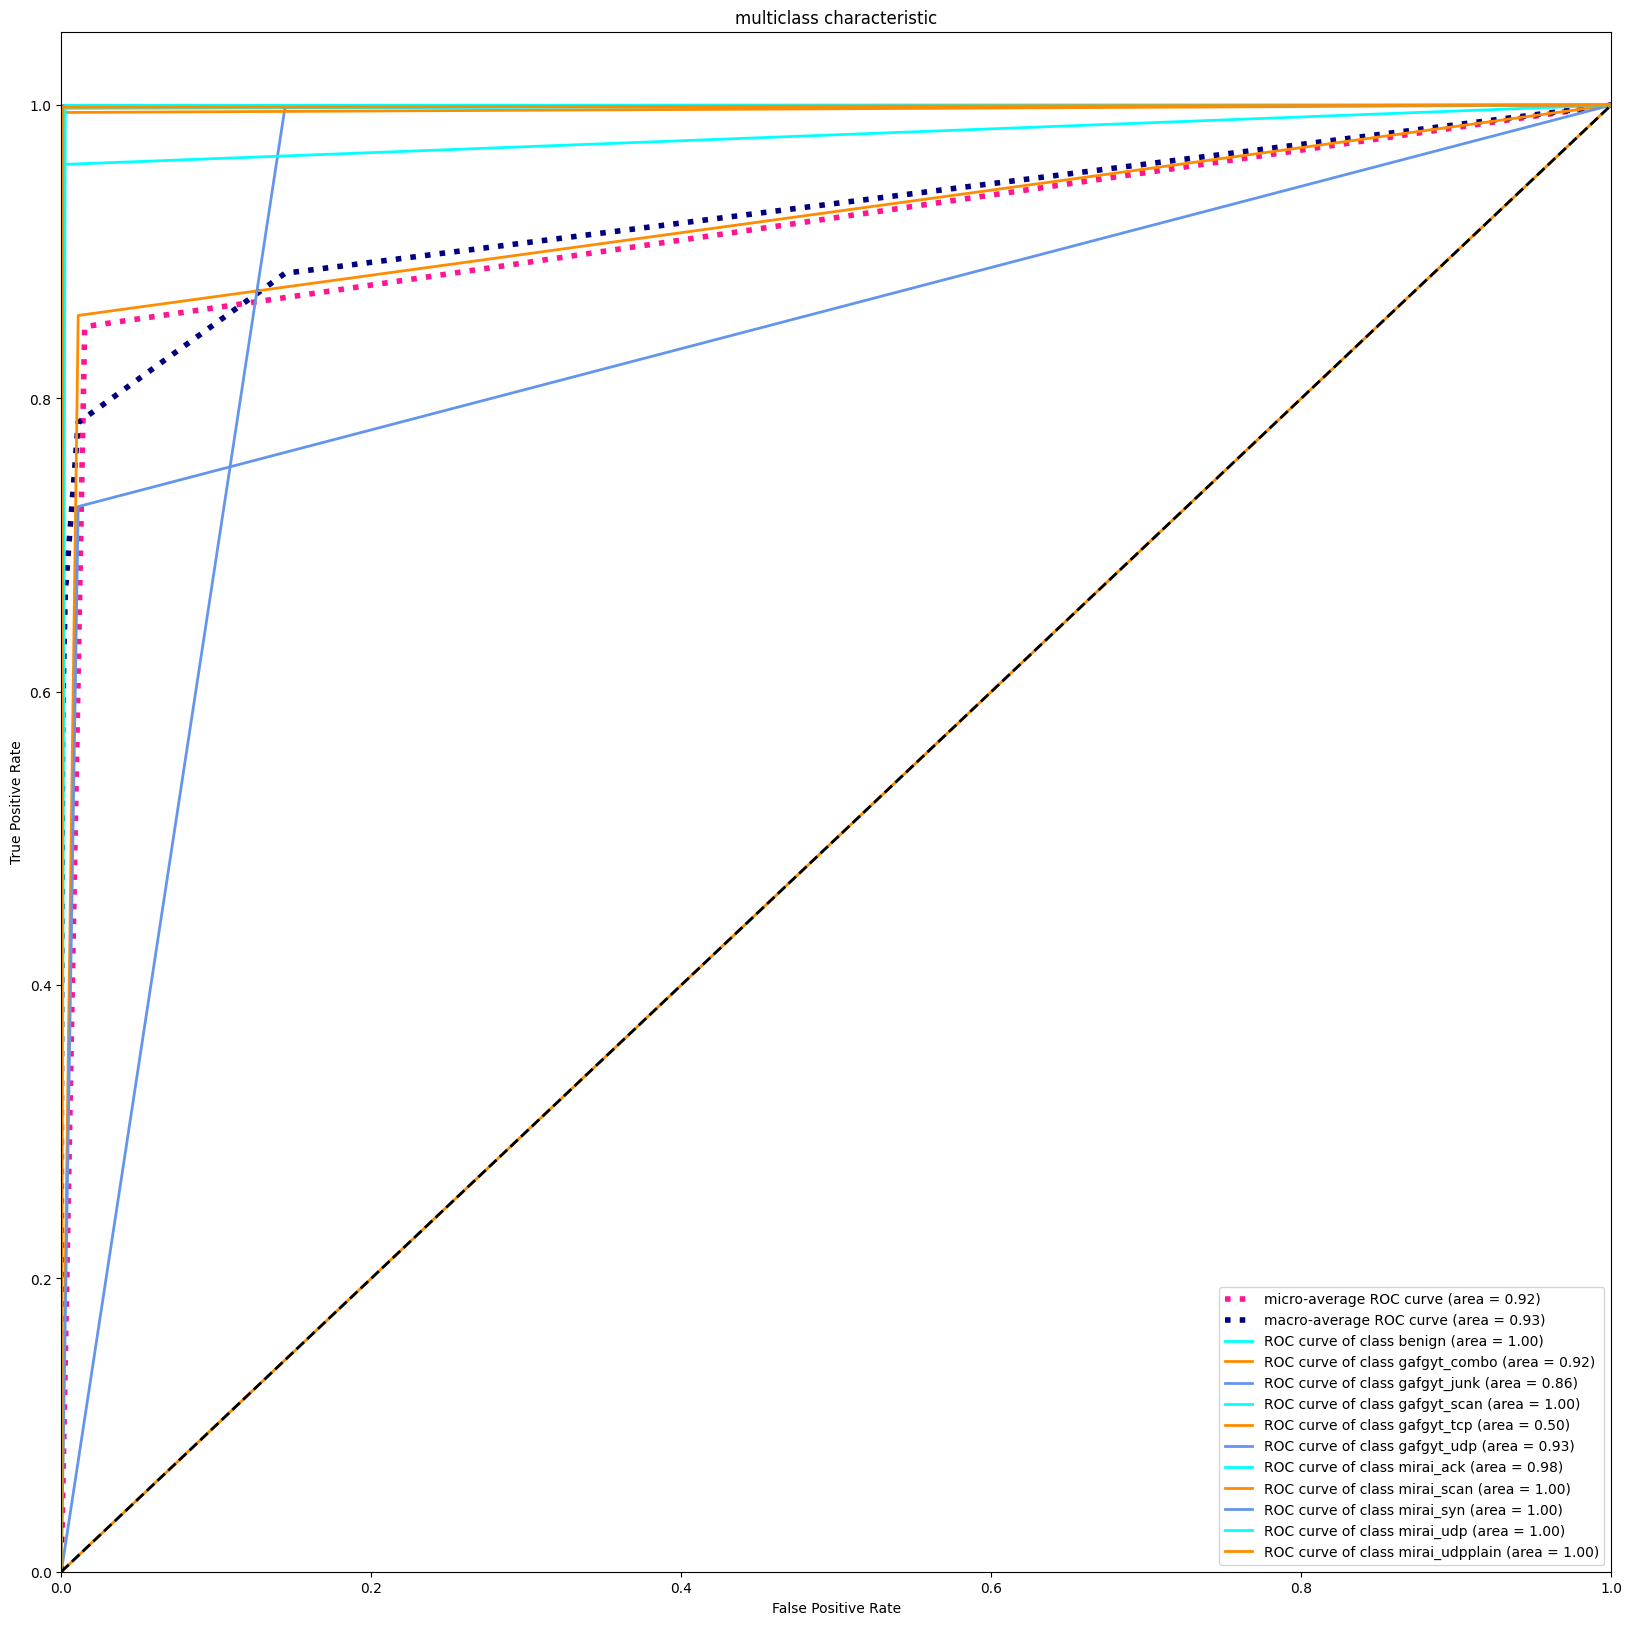

In [47]:
ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, len(label_encoder.classes_))


Accuracy:  0.84890010383213
Precision::  0.84890010383213
Recall::  0.84890010383213
F1_Score::  0.84890010383213

Macro precision_recall_fscore_support (macro) average
(0.8218937332463271, 0.8664117601620887, 0.8365034271881491, None)

Macro precision_recall_fscore_support (micro) average
(0.84890010383213, 0.84890010383213, 0.84890010383213, None)

Macro precision_recall_fscore_support (weighted) average
(0.7860272110898469, 0.84890010383213, 0.8069211763402205, None)

Confusion Matrix

Classification Report
                precision    recall  f1-score   support

        benign       1.00      1.00      1.00     12431
  gafgyt_combo       0.86      0.86      0.86     12276
   gafgyt_junk       0.72      0.73      0.72      6180
   gafgyt_scan       1.00      1.00      1.00      5859
    gafgyt_tcp       0.00      0.00      0.00     20902
    gafgyt_udp       0.50      1.00      0.66     20802
     mirai_ack       1.00      0.96      0.98     12111
    mirai_scan       1.00      0.99

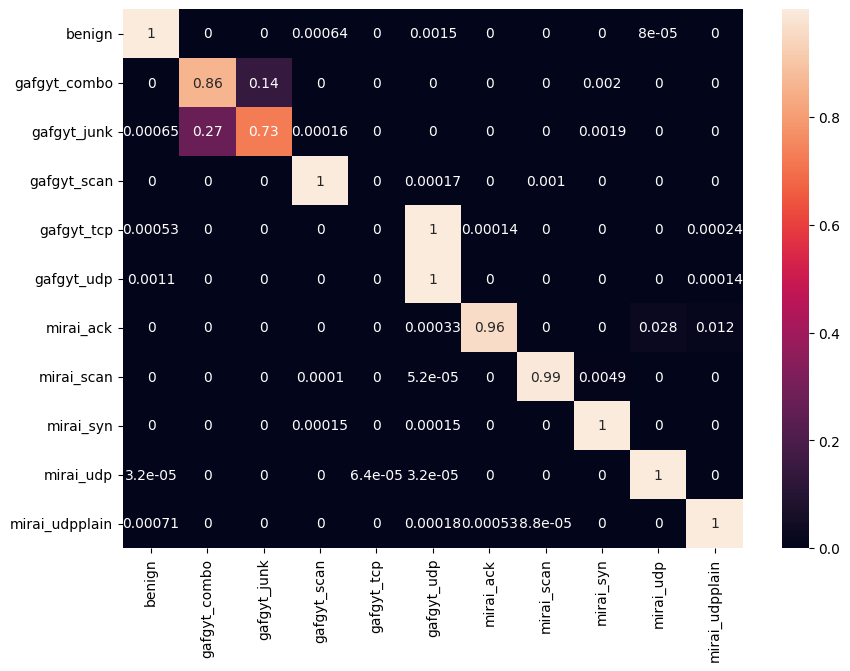

In [48]:
print_score(y_hat, y_true, label_encoder)

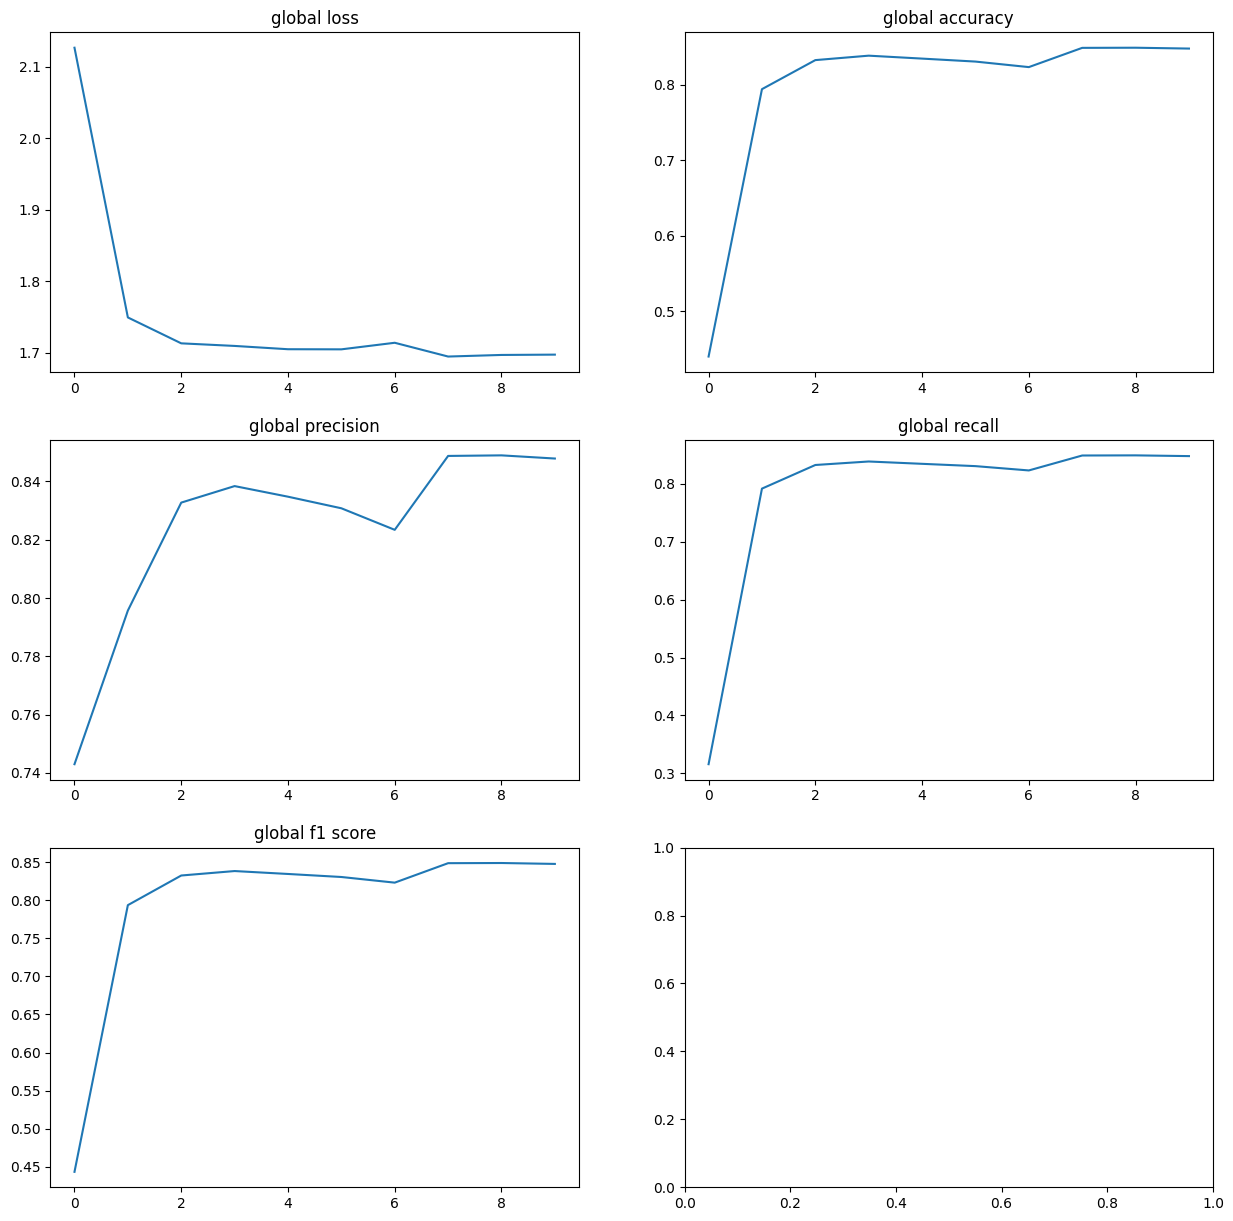

In [49]:
figure, axis = plt.subplots(3, 2, figsize=(15, 15))

axis[0, 0].plot(global_loss)
axis[0, 0].set_title("global loss")
  
axis[0, 1].plot(global_accuracy)
axis[0, 1].set_title("global accuracy")
  
axis[1, 0].plot(global_precision)
axis[1, 0].set_title("global precision")
  
axis[1, 1].plot(global_recall)
axis[1, 1].set_title("global recall")

axis[2, 0].plot(global_f1)
axis[2, 0].set_title("global f1 score")
  
plt.show()

In [50]:
global_accuracy

[0.43956607828459665,
 0.7939716997078212,
 0.8324741023350156,
 0.838365972037766,
 0.8344783039142298,
 0.8305363050249922,
 0.8232016516552774,
 0.8487129645280468,
 0.84890010383213,
 0.8477772680076304]